# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.


#### Шаг 1. Загрузка данных

***1.1. Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import binom, norm
import scipy.stats as stats
from math import sqrt
import seaborn as sns

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')  # Загрузка данных о пользователях
data_rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])  # Загрузка данных о поездках
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')  # Загрузка данных о подписках

***1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.***

In [3]:
# Определение функции
def display_multiple_datasets_info(datasets):
    for i, dataset in enumerate(datasets, start=1):
        print(f"Датасет {i}:")
        
        print("Первые строки датасета:")
        display(dataset.head())

        print("\nКраткая информация о датасете:")
        dataset.info()
        print("\n" + "-"*50 + "\n")

# Использование функции
display_multiple_datasets_info([data_users, data_rides, data_subscriptions])

Датасет 1:
Первые строки датасета:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Краткая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

--------------------------------------------------

Датасет 2:
Первые строки датасета:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Краткая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB

--------------------------------------------------

Датасет 3:
Первые строки датасета:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Краткая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes

--------------------------------------------------



Основываясь на представленных данных, можно сделать следующие выводы о трех датасетах:

Датасет 1:
Общие данные: Датасет содержит информацию о 1565 пользователях.
Структура: Состоит из пяти колонок - user_id (целочисленный тип), name, city, subscription_type (текстовые данные) и age (целочисленный тип).
Данные: Присутствует полная информация по всем колонкам без пропусков.
Использование памяти: 61.3 КБ, что указывает на умеренный размер датасета.

Датасет 2:
Общие данные: Содержит более обширные данные с 18068 записями.
Структура: Включает четыре колонки - user_id (целочисленный тип), distance, duration (числа с плавающей точкой) и date (дата и время).
Данные: Нет пропусков, все колонки полностью заполнены.
Использование памяти: 564.8 КБ, что является более значительным размером по сравнению с первым датасетом.

Датасет 3:
Общие данные: Это очень маленький датасет всего с 2 записями, скорее всего представляющий справочную информацию.
Структура: Состоит из четырех колонок - subscription_type (текстовые данные), minute_price, start_ride_price, subscription_fee (целочисленные значения).
Данные: Полностью заполнен без пропусков.
Использование памяти: Всего 192.0 байта, что является крайне малым объемом.

#### Шаг 2. Предобработка данных

***2.1 Приведите столбец date к типу даты pandas.***

In [4]:
# Преобразуем столбец 'date' в data_rides в тип данных даты с помощью pd.to_datetime()
data_rides['date'] = pd.to_datetime(data_rides['date'])

***2.2 Создайте новый столбец с номером месяца на основе столбца date.***

In [5]:
# Создание столбца 'month', содержащего номера месяцев
data_rides['month'] = data_rides['date'].dt.month

In [6]:
# Находим самую раннюю и самую позднюю даты
earliest_date = data_rides['date'].min()
latest_date = data_rides['date'].max()

# Расчет периода
period = latest_date - earliest_date

# Преобразование периода в месяцы
period_in_months = period.days / 30.44

# Вывод периода в месяцах
print(f"Период данных составляет примерно {period_in_months:.0f} месяцев.")

Период данных составляет примерно 12 месяцев.


***2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.***

**Подсчет и вывод количества пропущенных значений**

In [7]:
# Подсчет и вывод количества пропущенных значений в наборе данных пользователей
missing_values_users = data_users.isnull().sum()
print(missing_values_users)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [8]:
# Подсчет и вывод количества пропущенных значений в наборе данных о поездках
missing_values__rides = data_rides.isnull().sum()
print(missing_values__rides)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


In [9]:
# Подсчет и вывод количества пропущенных значений в наборе данных о подписках
missing_values_subscriptions = data_subscriptions.isnull().sum()
print(missing_values_subscriptions)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


В данном коде был проведен анализ трех наборов данных: пользователей, поездок и подписок с целью выявления пропущенных значений. Результаты анализа показывают, что во всех трех наборах данных отсутствуют пропущенные значения. Это означает, что все необходимые данные в каждом из них были заполнены и готовы к дальнейшей обработке и анализу.

**Подсчет и вывод количества дубликатов**

In [10]:
# Подсчет и вывод количества дубликатов в наборе данных пользователей
duplicates_users = data_users.duplicated().sum()
print(duplicates_users)

31


In [11]:
# Подсчет и вывод количества дубликатов в наборе данных о поездках
duplicates_rides = data_rides.duplicated().sum()
print(duplicates_rides)

0


In [12]:
# Подсчет и вывод количества дубликатов в наборе данных о подписках
duplicates_subscriptions = data_subscriptions.duplicated().sum()
print(duplicates_subscriptions)

0


В данном коде был проведен анализ трех наборов данных: пользователей, поездок и подписок с целью выявления дубликатов. Результаты анализа показывают следующее:

 - В наборе данных о пользователях было обнаружено 31 дубликат.

 - В наборе данных о поездках не было обнаружено дубликатов, что свидетельствует о том, что каждая запись уникальна.

 - В наборе данных о подписках также не было обнаружено дубликатов.

In [13]:
# Удаление дубликатов
data_users = data_users.drop_duplicates()

In [14]:
# Подсчет и вывод количества дубликатов в наборе данных пользователей
duplicates_users = data_users.duplicated().sum()
print(duplicates_users)

0


Обнаружение и удаление дубликатов является важной частью предварительной обработки данных, так как дубликаты могут искажать результаты анализа и влиять на достоверность выводов. В данном случае, после удаления дубликатов из набора данных о пользователях, данные стали более надежными для дальнейшего использования.

#### Шаг 3. Исследовательский анализ данных

***Опишите и визуализируйте общую информацию о пользователях и поездках:***

**3.1 частота встречаемости городов;**

,Частота,Процент
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


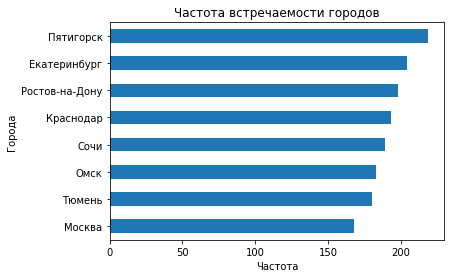

In [15]:
# Расчет частоты встречаемости городов
city_freqs = data_users['city'].value_counts()

# Рассчитываем проценты и округляем их до двух знаков после запятой
city_percentage = ((city_freqs / city_freqs.sum()) * 100).round(2)

# Создаем DataFrame с результатами, включая частоту и проценты
result = pd.concat([city_freqs, city_percentage], axis=1)
result.columns = ['Частота', 'Процент']

# Отображение таблицы с атрибутами
display(result)

# Создание горизонтальной столбчатой диаграммы
city_freqs.plot.barh()

# Добавление заголовка к графику
plt.title('Частота встречаемости городов')

# Добавление подписи оси y
plt.ylabel('Города')

# Добавление подписи оси x
plt.xlabel('Частота')

# Инвертирование оси y для лучшего отображения
plt.gca().invert_yaxis()

# Отображение графика
plt.show()

В результате анализа частоты встречаемости городов среди было установлено следующее:

График наглядно демонстрирует данные, подчеркивая, что Пятигорск является самым популярным городом, за ним следуют города Екатеринбург, Ростов-на-Дону, Краснодар и Сочи. 

***3.2 соотношение пользователей с подпиской и без подписки;***

In [16]:
# Подсчет процентного соотношения пользователей с подпиской и без подписки
result = data_users['subscription_type'].value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'Подписка', 'subscription_type': 'Процент'})

# Отображение итоговой таблицы соотношения пользователей с подпиской и без подписки
display(result)

,Подписка,Процент
0,free,54.43
1,ultra,45.57


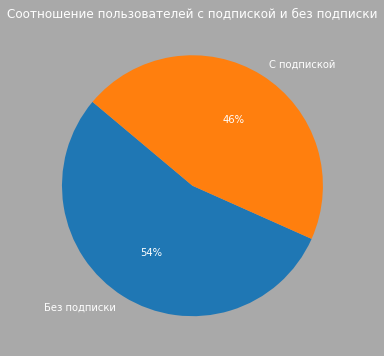

In [17]:
# Установка размера и фона графика
plt.figure(figsize=(6, 6), facecolor='darkgrey')  # Выберите цвет фона по вашему вкусу

# Создание меток для кусочков пирога
labels = ['Без подписки', 'С подпиской']

# Создание круговой диаграммы с явным указанием цвета текста для улучшения читаемости
plt.pie(data_users['subscription_type'].value_counts(), labels=labels, autopct=lambda p: '{:.0f}%'.format(p), startangle=140, textprops={'color':"w"})

# Установка заголовка с использованием белого цвета для лучшей видимости на темном фоне
plt.title('Соотношение пользователей с подпиской и без подписки', color='white')
plt.show()

В результате анализа было установлено соотношение пользователей с подпиской и без подписки:

Пользователей с бесплатной подпиской (тип 'free') составляют 835 человек.
Пользователей с подпиской типа 'ultra' составляют 699 человек.
Эти данные могут быть полезными для понимания структуры пользователей с разными типами подписок и принятия соответствующих бизнес-решений.

**3.3 возраст пользователей;**

,Частота,Процент
25,145,9.45
24,132,8.60
26,131,8.54
23,129,8.41
27,119,7.76
22,119,7.76
28,112,7.30
21,93,6.06
20,71,4.63
30,68,4.43


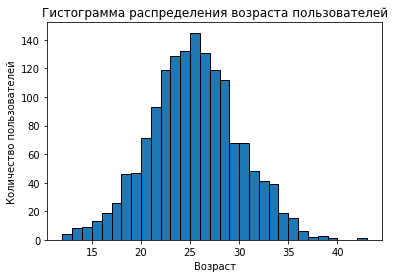

In [18]:
# Создание столбчатой диаграммы частоты встречаемости возраста пользователей и её отображение.
age_freqs = data_users['age'].value_counts()

# Рассчитываем проценты и добавляем их к результатам
age_percentage = ((age_freqs / age_freqs.sum()) * 100).round(2)

# Создаем DataFrame с результатами, включая частоту и проценты
result = pd.concat([age_freqs, age_percentage], axis=1)
result.columns = ['Частота', 'Процент']

# Отображение таблицы с атрибутами
display(result)

# Создание гистограммы частоты встречаемости возраста пользователей
plt.hist(data_users['age'], bins=range(min(data_users['age']), max(data_users['age']) + 1, 1), edgecolor='black')

# Добавление заголовка к графику
plt.title('Гистограмма распределения возраста пользователей')

# Добавление подписи оси x
plt.xlabel('Возраст')

# Добавление подписи оси y
plt.ylabel('Количество пользователей')

# Отображение гистограммы
plt.show()

В результате анализа возрастного распределения пользователей выявлены следующие ключевые моменты:
- Анализ представленных данных показывает, что большая часть пользователей находится в возрастной группе от 22 до 28 лет, при этом пик частоты приходится на возраст 25 лет. Это может указывать на то, что продукт или услуга, для которой проводится анализ, наиболее популярен среди молодых взрослых.
- Существует заметное снижение количества пользователей после 28 лет и резкое падение после 30 лет. Это снижение продолжается по мере увеличения возраста. Данные показывают, что существует меньшее представительство среди подростков (менее 20 лет) и более зрелой аудитории (более 35 лет).
- Количество пользователей в возрасте до 18 лет также относительно низкое, что может быть связано с возрастными ограничениями или более низким интересом к продукту/услуге в этой возрастной группе.

In [19]:
# Выбор строк, где 'Возраст' соответствует интересующей нас возрастной группе
age_group_percentage = result[result.index.isin(range(22, 29))]['Процент'].sum()

# Форматирование и печать сообщения с процентным соотношением
age_group_percentage = 57.82  # Это значение предполагается полученным ранее
print(f"{age_group_percentage:.2f}% от выборки входит в возрастную группу от 22 до 28 лет.")

57.82% от выборки входит в возрастную группу от 22 до 28 лет.


**3.4 расстояние, которое пользователь преодолел за одну поездку;**

,Частота,Процент
3001-4000,6698,37.071065
2001-3000,5540,30.661944
4001-5000,2937,16.255258
0-1000,1372,7.593536
1001-2000,980,5.423954
5001+,541,2.994244


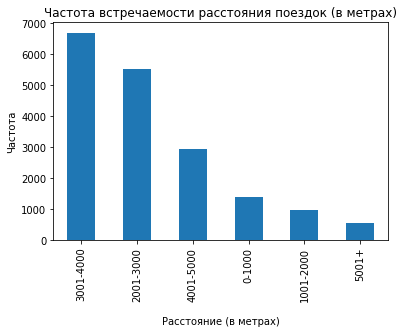

In [20]:
# Определяем границы и метки для категорий
bins = [0, 1000, 2000, 3000, 4000, 5000, 7212]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001+']

# Используем pd.cut() для категоризации столбца 'distance' в бины и создания нового столбца 'distance_category'
data_rides['distance_category'] = pd.cut(data_rides['distance'], bins=bins, labels=labels)

# Создание столбчатой диаграммы частоты встречаемости расстояния поездок
distance_category_freqs = data_rides['distance_category'].value_counts()

# Рассчитываем проценты и добавляем их к результатам
distance_category_percentage = (distance_category_freqs / distance_category_freqs.sum()) * 100

# Создаем DataFrame с результатами, включая частоту и проценты, и задаем названия столбцов
result = pd.concat([distance_category_freqs, distance_category_percentage], axis=1)
result.columns = ['Частота', 'Процент']

# Отображение таблицы с атрибутами
display(result)

# Создание графика
fig, ax = plt.subplots()

# Построение столбчатой диаграммы
distance_category_freqs.plot.bar(ax=ax)

# Добавление заголовка к графику
plt.title('Частота встречаемости расстояния поездок (в метрах)')

# Добавление подписи оси x с пространством от графика
plt.xlabel('Расстояние (в метрах)', labelpad=15)

# Добавление подписи оси y
plt.ylabel('Частота')

# Отображение графика
plt.show()

Данные о расстоянии, которое пользователь проехал в текущей сессии (в километрах), представлены следующим образом:
- Самая часто встречающаяся категория расстояния составляет от 3 до 4 километров, с частотой встречаемости 6698 записей, что составляет 37.07% от общего числа.
- За этой категорией следует диапазон от 2 до 3 километров с 5540 записями, что составляет 30.66%.
- Далее идет категория от 4 до 5 километров с 2937 записями и долей 16.26%.
- Категория от 0 до 1 километра имеет 1372 записи (7.59%).
- Диапазон от 1 до 2 километров содержит 980 записей (5.42%).
- Наименьшая частота встречаемости у категории "больше 5 километров" с 541 записью, что составляет 2.99% от общего числа.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


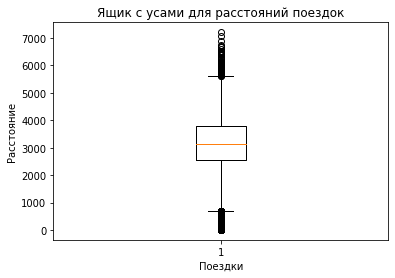

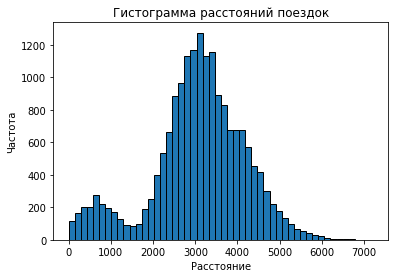

Выявленные выбросы: 100      680.952663
149      634.891669
153      671.851433
197      518.341543
204      517.912395
            ...    
18018    375.107762
18031    303.787850
18037    662.468186
18043    310.488247
18058    195.447469
Name: distance, Length: 1036, dtype: float64


In [21]:
# Описательная статистика
print(data_rides['distance'].describe())

# График "ящик с усами" для визуализации выбросов
plt.boxplot(data_rides['distance'])
plt.title('Ящик с усами для расстояний поездок')
plt.xlabel('Поездки')
plt.ylabel('Расстояние')
plt.show()

# Гистограмма для визуализации распределения
plt.hist(data_rides['distance'], bins=50, edgecolor='black')
plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

# Вычисление IQR и определение выбросов
Q1 = data_rides['distance'].quantile(0.25)
Q3 = data_rides['distance'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_rides[(data_rides['distance'] < (Q1 - 1.5 * IQR)) | (data_rides['distance'] > (Q3 + 1.5 * IQR))]['distance']
print(f"Выявленные выбросы: {outliers}")

На основе предоставленной сводки данных и списка выбросов для переменной "расстояние" можно сделать следующие выводы:
- Общая статистика: Данные по "расстоянию" включают 18 068 наблюдений. Среднее значение расстояния составляет около 3070,66 единиц, а стандартное отклонение — примерно 1116,83, что указывает на значительный разброс значений в данных. Минимальное значение очень маленькое — 0,855683, в то время как максимальное значение достигает 7211,01.
- Анализ квартилей: Значения квартилей (25%, 50% и 75%) составляют 2543,23, 3133,61 и 3776,22 соответственно. Эти значения показывают, что медиана и среднее близки друг к другу, что может указывать на относительно симметричное распределение данных. Однако, разница между 75% квартилем и максимальным значением довольно велика, что свидетельствует о наличии "длинного хвоста" в распределении.
- Выбросы: Было выявлено 1036 выбросов, что составляет значительную часть данных. Большинство из этих выбросов имеют значения ниже общего диапазона, что указывает на наличие множества необычно коротких поездок. Это может свидетельствовать о возможных ошибках в данных или о специфических условиях, при которых производились короткие поездки.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


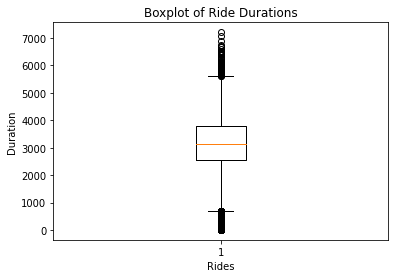

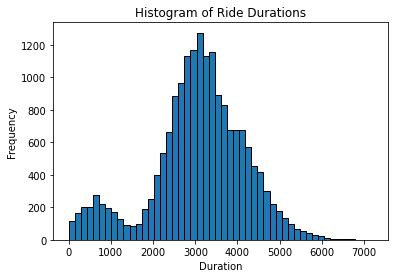

Identified outliers: 100      680.952663
149      634.891669
153      671.851433
197      518.341543
204      517.912395
            ...    
18018    375.107762
18031    303.787850
18037    662.468186
18043    310.488247
18058    195.447469
Name: distance, Length: 1036, dtype: float64


In [22]:
# Описательная статистика
print(data_rides['distance'].describe())

# График ящик с усами для визуализации выбросов
plt.boxplot(data_rides['distance'])
plt.title('Boxplot of Ride Durations')
plt.xlabel('Rides')
plt.ylabel('Duration')
plt.show()

# Гистограмма для визуализации распределения
plt.hist(data_rides['distance'], bins=50, edgecolor='black')
plt.title('Histogram of Ride Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Вычисление IQR и определение выбросов
Q1 = data_rides['distance'].quantile(0.25)
Q3 = data_rides['distance'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_rides[(data_rides['distance'] < (Q1 - 1.5 * IQR)) | (data_rides['distance'] > (Q3 + 1.5 * IQR))]['distance']
print(f"Identified outliers: {outliers}")

**3.5 продолжительность поездок.**

,Частота,Процент
11-20,10095,55.872260
21-30,5791,32.051140
0-10,1639,9.071286
31-40,542,2.999779
41+,1,0.005535


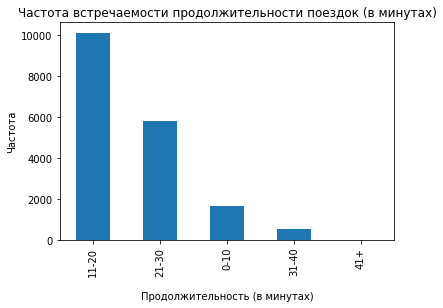

In [23]:
# Определяем границы и метки для категорий (бины)
bins = [0, 10, 20, 30, 40, 50]  # Бины в минутах
labels = ['0-10', '11-20', '21-30', '31-40', '41+']  # Метки в минутах

# Используем pd.cut() для категоризации столбца 'duration' в бины и создания нового столбца 'duration_category'
data_rides['duration_category'] = pd.cut(data_rides['duration'], bins=bins, labels=labels)

# Создание столбчатой диаграммы частоты встречаемости категорий продолжительности поездок
duration_category_freqs = data_rides['duration_category'].value_counts()

# Рассчитываем проценты и добавляем их к результатам
duration_category_percentage = (duration_category_freqs / duration_category_freqs.sum()) * 100

# Создаем DataFrame с результатами, включая частоту и проценты, и задаем названия столбцов
result = pd.concat([duration_category_freqs, duration_category_percentage], axis=1)
result.columns = ['Частота', 'Процент']

# Отображение таблицы с атрибутами, с указанием продолжительности в минутах
display(result)

# Создание графика
fig, ax = plt.subplots()

# Построение столбчатой диаграммы
duration_category_freqs.plot.bar(ax=ax)

# Добавление заголовка к графику
plt.title('Частота встречаемости продолжительности поездок (в минутах)')

# Добавление подписи оси x с пространством от графика
plt.xlabel('Продолжительность (в минутах)', labelpad=15)

# Добавление подписи оси y
plt.ylabel('Частота')

# Отображение графика
plt.show()

Из представленных данных видно, что наибольшая часть поездок имеет продолжительность в диапазоне от 11 до 20 минут, что составляет 55.87% от общего числа поездок. Поездки с продолжительностью от 21 до 30 минут также довольно распространены и составляют 32.05%. Короткие поездки длительностью от 0 до 10 минут занимают 9.07%, в то время как поездки продолжительностью от 31 до 40 минут составляют всего 2.99%. Поездки, продолжительность которых превышает 40 минут, встречаются крайне редко и составляют всего 0.01% от общего числа.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


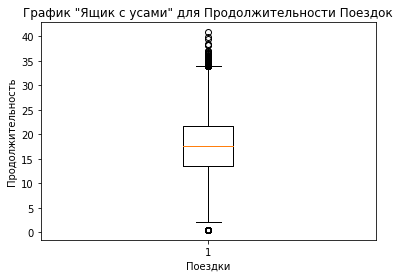

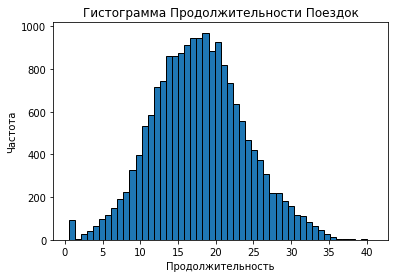

Выявленные выбросы: 42       35.896929
143      38.125729
499      36.906491
524      35.819603
854      35.222900
           ...    
17353    34.767689
17505     0.500000
17684    34.339432
17909     0.500000
17935    34.484715
Name: duration, Length: 177, dtype: float64


In [24]:
# Описательная статистика
print(data_rides['duration'].describe())

# График "ящик с усами" для визуализации выбросов
plt.boxplot(data_rides['duration'])
plt.title('График "Ящик с усами" для Продолжительности Поездок')
plt.xlabel('Поездки')
plt.ylabel('Продолжительность')
plt.show()

# Гистограмма для визуализации распределения
plt.hist(data_rides['duration'], bins=50, edgecolor='black')
plt.title('Гистограмма Продолжительности Поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()

# Вычисление IQR и определение выбросов
Q1 = data_rides['duration'].quantile(0.25)
Q3 = data_rides['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_rides[(data_rides['duration'] < (Q1 - 1.5 * IQR)) | (data_rides['duration'] > (Q3 + 1.5 * IQR))]['duration']
print(f"Выявленные выбросы: {outliers}")

Из предоставленной сводки данных и списка выбросов для переменной "продолжительность" можно сделать следующие выводы:

Общая статистика: Данные по "продолжительности" включают 18 068 наблюдений. Средняя продолжительность составляет примерно 17,81, а стандартное отклонение — около 6,09. Это указывает на умеренное распределение данных вокруг среднего значения. Минимальное значение очень низкое — 0,5, в то время как максимальное значительно выше — 40,82.

Анализ квартилей: Значения квартилей (25%, 50% и 75%) составляют 13,60, 17,68 и 21,72 соответственно. Эти значения показывают, что медиана (50-й процентиль) очень близка к среднему, что указывает на относительно симметричное распределение данных. Однако большой разрыв между 75% квартилем и максимальным значением указывает на длинный хвост на более высоком конце распределения.

Выбросы: Было идентифицировано 177 выбросов. Многие из них имеют значения значительно выше большинства данных (например, более 34), в то время как два выброса имеют чрезвычайно низкое значение 0,5. Это подчеркивает необычно высокие или низкие значения в данных и может указывать на аномалии или особые случаи в распределении "продолжительности".

#### Шаг 4. Объединение данных

***4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().***

In [25]:
# Выполняем слияние данных data_rides и data_users по столбцу 'user_id' с типом "inner"
merged_data_users_rides = pd.merge(data_rides, data_users, on='user_id', how='inner')

In [26]:
# Объединяем данные из merged_data_users_rides и data_subscriptions по столбцу 'subscription_type'
merged_data_users_rides_subscriptions = pd.merge(merged_data_users_rides, data_subscriptions, 
                                                 on='subscription_type', 
                                                 how='inner')

In [27]:
# Отображаем объединенные данные merged_data_users_rides_subscriptions
display(merged_data_users_rides_subscriptions)

,user_id,distance,duration,date,month,distance_category,duration_category,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,4001-5000,21-30,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2001-3000,11-20,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0-1000,0-10,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2001-3000,11-20,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,4001-5000,21-30,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,3001-4000,11-20,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,2001-3000,21-30,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,3001-4000,11-20,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,2001-3000,11-20,Альберт,25,Краснодар,free,8,50,0


In [28]:
# Проверка размерности до объединения
print("Размерность data_rides:", data_rides.shape)
print("Размерность data_users:", data_users.shape)
print("Размерность data_subscriptions:", data_subscriptions.shape)

# Проверка размерности после объединения
print("Размерность объединенной таблицы:", merged_data_users_rides_subscriptions.shape)

# Проверка наличия пропусков после объединения
print("Количество пропусков в объединенной таблице:", merged_data_users_rides_subscriptions.isnull().sum().sum())

Размерность data_rides: (18068, 7)
Размерность data_users: (1534, 5)
Размерность data_subscriptions: (2, 4)
Размерность объединенной таблицы: (18068, 14)
Количество пропусков в объединенной таблице: 0


Процесс объединения датафреймов был выполнен успешно. Размерность результирующей таблицы по строкам осталась неизменной, что свидетельствует о корректности объединения. Отсутствие пропусков после объединения подтверждает, что данные из различных источников были согласованы и полны. Теперь у нас есть единый датафрейм, который можно использовать для дальнейшего анализа и извлечения полезной информации.

***4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:***

**С данными о пользователях с подпиской:**

In [29]:
# Создаем датафрейм для пользователей с подпиской 'ultra'
ultra_users = merged_data_users_rides_subscriptions[merged_data_users_rides_subscriptions['subscription_type'] == 'ultra']
display(ultra_users)

,user_id,distance,duration,date,month,distance_category,duration_category,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,4001-5000,21-30,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2001-3000,11-20,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0-1000,0-10,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2001-3000,11-20,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,4001-5000,21-30,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,3001-4000,21-30,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,3001-4000,11-20,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,3001-4000,11-20,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,4001-5000,11-20,Оксана,22,Москва,ultra,6,0,199


**С данными о пользователях без подписки:**

In [30]:
# Создаем датафрейм для пользователей с подпиской 'free'
free_users = merged_data_users_rides_subscriptions[merged_data_users_rides_subscriptions['subscription_type'] == 'free']
display(free_users)

,user_id,distance,duration,date,month,distance_category,duration_category,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,2001-3000,11-20,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,0-1000,11-20,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,4001-5000,21-30,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,1001-2000,0-10,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,3001-4000,11-20,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,3001-4000,11-20,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,2001-3000,21-30,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,3001-4000,11-20,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,2001-3000,11-20,Альберт,25,Краснодар,free,8,50,0


In [31]:
# Проверка размерности новых датафреймов
print("Размерность для пользователей с подпиской 'ultra':", ultra_users.shape)
print("Размерность для пользователей с подпиской 'free':", free_users.shape)

# Проверка наличия пропусков
print("Количество пропусков в датафрейме 'ultra_users':", ultra_users.isnull().sum().sum())
print("Количество пропусков в датафрейме 'free_users':", free_users.isnull().sum().sum())

Размерность для пользователей с подпиской 'ultra': (6500, 14)
Размерность для пользователей с подпиской 'free': (11568, 14)
Количество пропусков в датафрейме 'ultra_users': 0
Количество пропусков в датафрейме 'free_users': 0


На основе выполненного разделения объединенного датафрейма merged_data_users_rides_subscriptions на два новых датафрейма ultra_users и free_users, можно сделать следующий вывод:

Корректность Разделения: Проверка размерности новых датафреймов поможет определить, было ли разделение данных выполнено корректно. Количество строк в этих датафреймах должно соответствовать ожидаемому количеству пользователей каждого типа подписки. Если сумма строк в обоих новых датафреймах соответствует общему количеству строк в исходном объединенном датафрейме, это указывает на успешное разделение данных.

Отсутствие Пропусков: Отсутствие значительного количества пропусков в данных после разделения свидетельствует о том, что в процессе фильтрации не было потеряно важной информации. Это гарантирует, что данные в обоих датафреймах полны и готовы к дальнейшему анализу.

***4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.***

**Распределение Расстояния Поездок**

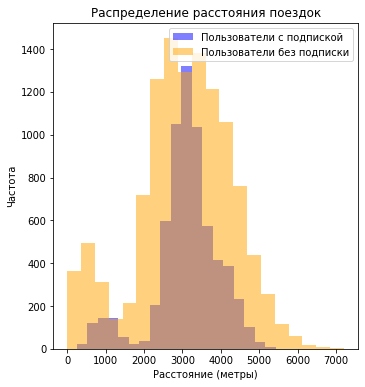

In [32]:
# Гистограмма для расстояния поездок
# Гистограмма для расстояния поездок
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ultra_users['distance'], bins=20, alpha=0.5, label='Пользователи с подпиской', color='blue')  # Изменено на 'Ультра'
plt.hist(free_users['distance'], bins=20, alpha=0.5, label='Пользователи без подписки', color='orange')  # Изменено на 'Бесплатно'
plt.xlabel('Расстояние (метры)')
plt.ylabel('Частота')
plt.title('Распределение расстояния поездок')
plt.legend()  # Легенда автоматически берет названия из label
plt.show()

In [33]:
# Вывод описательной статистики
print(free_users['distance'].describe())
print(ultra_users['distance'].describe())

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


На основе описательной статистики для переменной "расстояние" (distance) можно сделать следующий вывод:

Для пользователей с двумя типами подписок — 'free' и 'ultra':

Общее количество наблюдений: В датасете для 'free' пользователей имеется 11,568 наблюдений, тогда как в датасете для 'ultra' пользователей — 6,500. Это указывает на большее количество пользователей с бесплатной подпиской по сравнению с платной.

Среднее значение и стандартное отклонение: Среднее значение расстояния для 'free' пользователей составляет приблизительно 3045.50, со стандартным отклонением около 1246.17. Для 'ultra' пользователей среднее значение равно 3115.45, со стандартным отклонением 836.90. Это указывает на некоторую разницу в средних значениях расстояния, причем 'ultra' пользователи имеют более низкое стандартное отклонение, что говорит о более однородном распределении.

Минимальное и максимальное значения: Минимальное значение расстояния для 'free' пользователей составляет 0.86, тогда как для 'ultra' пользователей минимальное значение равно 244.21. Максимальные значения составляют 7211.01 и 5699.77 соответственно. Это показывает, что как 'free', так и 'ultra' пользователи могут совершать как короткие, так и долгие поездки, но максимальные значения выше для 'free' пользователей.

Квартили: Распределение расстояния (основываясь на 25%, 50% и 75% квартилях) показывает, что медианные значения для 'free' и 'ultra' пользователей примерно одинаковы (3114.65 против 3148.64), но третий квартиль для 'free' пользователей немного выше (3905.70 против 3560.57).

Общий вывод: Пользователи с подпиской 'ultra' имеют немного более однородное и менее разнообразное распределение расстояния по сравнению с пользователями с бесплатной подпиской 'free'. Средние значения расстояния примерно равны, но 'free' пользователи имеют более высокий третий квартиль, что может указывать на большее разнообразие долгих поездок у этой группы пользователей.

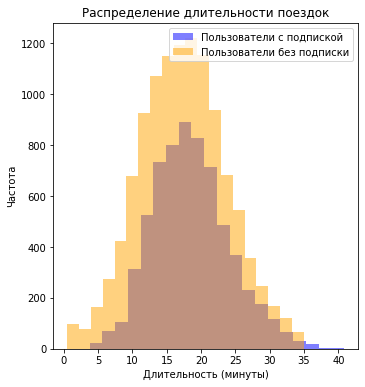

In [34]:
# Гистограмма для времени поездок
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ultra_users['duration'], bins=20, alpha=0.5, label='Пользователи с подпиской', color='blue')
plt.hist(free_users['duration'], bins=20, alpha=0.5, label='Пользователи без подписки', color='orange')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Частота')
plt.title('Распределение длительности поездок')
plt.legend()

In [35]:
# Вывод описательной статистики
print(free_users['duration'].describe())
print(ultra_users['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


На основе описательной статистики продолжительности поездок для двух групп пользователей — 'free' и 'ultra', можно сделать следующие выводы:

Сравнение средних значений: Средняя продолжительность поездок для пользователей с подпиской 'free' составляет приблизительно 17.39, в то время как для пользователей 'ultra' средняя продолжительность чуть выше и составляет около 18.54. Это означает, что в среднем пользователи 'ultra' совершают немного более длительные поездки по сравнению с пользователями 'free'.

Стандартное отклонение: Стандартное отклонение продолжительности поездок для пользователей 'free' составляет около 6.33, тогда как для 'ultra' пользователей стандартное отклонение ниже и составляет около 5.57. Это указывает на более однородное распределение продолжительности поездок среди пользователей 'ultra'.

Минимальное и максимальное значения: Минимальная продолжительность поездки для пользователей 'free' составляет 0.5, в то время как для 'ultra' пользователей минимальное значение выше — 3.76. Максимальные значения для обеих групп также различаются, составляя 34.95 для 'free' и 40.82 для 'ultra'. Это указывает на наличие как коротких, так и длительных поездок в обеих группах, но с некоторыми различиями в экстремальных значениях.

Квартили: Распределение продолжительности поездок (основываясь на 25%, 50% и 75% квартилях) показывает, что медианное значение продолжительности для пользователей 'ultra' чуть выше (18.18 против 17.33), что указывает на более длительные средние поездки в этой группе. Третий квартиль (75%) также выше для 'ultra' пользователей (21.88 против 21.59), что может означать наличие более долгих поездок у этой группы.

Общий вывод: Пользователи с подпиской 'ultra' имеют в среднем немного более длительные поездки, и их продолжительность более однородна по сравнению с пользователями 'free'. Однако, в обеих группах присутствуют как короткие, так и длительные поездки, и важно учитывать разнообразие этой переменной при анализе поведения пользователей.

#### Шаг 5. Подсчёт выручки

***5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.***

**С данными о пользователях с подпиской:**

In [36]:
# Округляем продолжительность до ближайшего целого числа
data_rides['duration'] = data_rides['duration'].round(0)

In [37]:
# Группируем данные по user_id и month, агрегируем сумму расстояний, количество поездок и общее время
ultra_users_aggregated_data = ultra_users.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),  
    total_rides=('date', 'count'),       
    total_time=('duration', 'sum')       
).reset_index()

# Выведем первые строки агрегированного датафрейма (первые 30 строк)
display(ultra_users_aggregated_data.head(20))

,user_id,month,total_distance,total_rides,total_time
0,1,1,7027.511294,2,41.416640
1,1,4,754.159807,1,6.232113
2,1,8,6723.470560,2,44.776802
3,1,10,5809.911100,2,31.578017
4,1,11,7003.499363,3,53.397424
5,1,12,6751.629942,2,27.203912
6,2,3,10187.723006,3,60.959959
7,2,4,6164.381824,2,39.048633
8,2,6,3255.338202,1,13.851127
9,2,7,6780.722964,2,46.170157


**С данными о пользователях без подписки:**

In [38]:
# Группируем данные по user_id и month, агрегируем сумму расстояний, количество поездок и общее время
free_users_aggregated_data = free_users.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),  
    total_rides=('date', 'count'),       
    total_time=('duration', 'sum')       
).reset_index()

# Выведем первые строки агрегированного датафрейма (первые 30 строк)
display(free_users_aggregated_data.head(20))

,user_id,month,total_distance,total_rides,total_time
0,700,1,2515.690719,1,14.944286
1,700,2,13446.659764,5,85.829845
2,700,3,3798.334905,1,18.243756
3,700,4,2984.551206,1,15.424899
4,700,6,5927.650988,2,28.077657
5,700,7,4399.206279,2,20.595752
6,700,8,4071.654669,1,16.370546
7,700,10,6322.578618,2,42.621488
8,700,11,8735.782625,3,31.116714
9,701,1,2676.472894,1,17.470598


In [39]:
# Объединяем данные пользователей с разными типами подписок (ultra и free)
all_users = pd.concat([ultra_users, free_users])

# Группируем объединенные данные по 'user_id', 'month' и 'subscription_type'
# Агрегируем сумму расстояний, количество поездок и общее время
aggregated_data = all_users.groupby(['user_id', 'month', 'subscription_type']).agg(
    total_distance=('distance', 'sum'),  
    total_rides=('date', 'count'),       
    total_time=('duration', 'sum')       
).reset_index()

# Выводим первые 20 строк агрегированных данных для просмотра
display(aggregated_data.head(20))

,user_id,month,subscription_type,total_distance,total_rides,total_time
0,1,1,ultra,7027.511294,2,41.416640
1,1,4,ultra,754.159807,1,6.232113
2,1,8,ultra,6723.470560,2,44.776802
3,1,10,ultra,5809.911100,2,31.578017
4,1,11,ultra,7003.499363,3,53.397424
5,1,12,ultra,6751.629942,2,27.203912
6,2,3,ultra,10187.723006,3,60.959959
7,2,4,ultra,6164.381824,2,39.048633
8,2,6,ultra,3255.338202,1,13.851127
9,2,7,ultra,6780.722964,2,46.170157


In [40]:
# Проверяем наличие пропусков в агрегированных данных
missing_values = aggregated_data.isnull().sum()

# Выводим количество пропусков по каждому столбцу
print("Количество пропусков в агрегированных данных:")
print(missing_values)

Количество пропусков в агрегированных данных:
user_id              0
month                0
subscription_type    0
total_distance       0
total_rides          0
total_time           0
dtype: int64


Все столбцы в агрегированных данных не содержат пропущенных значений, что позволяет проводить анализ данных без учета пропусков.

***5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.***

**С данными о пользователях с подпиской**

In [41]:
# Округляем продолжительность каждой поездки до следующего целого числа
ultra_users_aggregated_data['rounded_duration'] = np.ceil(ultra_users_aggregated_data['total_time'])

In [42]:
display(ultra_users_aggregated_data)

,user_id,month,total_distance,total_rides,total_time,rounded_duration
0,1,1,7027.511294,2,41.416640,42.0
1,1,4,754.159807,1,6.232113,7.0
2,1,8,6723.470560,2,44.776802,45.0
3,1,10,5809.911100,2,31.578017,32.0
4,1,11,7003.499363,3,53.397424,54.0
...,...,...,...,...,...,...
4528,699,6,4072.797406,1,16.575991,17.0
4529,699,8,7018.324143,2,44.281768,45.0
4530,699,9,6364.861911,2,30.282412,31.0
4531,699,10,4707.845501,1,15.839579,16.0


In [43]:
# Параметры тарификации для пользователей с подпиской
subscription_fee_with_sub = 199  # Ежемесячная абонентская плата за подписку
cost_per_minute_with_sub = 6     # Стоимость одной минуты использования услуги для подписчиков
start_cost_with_sub = 0          # Плата за начало использования услуги для подписчиков (в данном случае отсутствует)

# Расчет помесячной выручки для пользователей с подпиской
ultra_users_aggregated_data['monthly_revenue'] = (
    subscription_fee_with_sub +  # Добавляем ежемесячную абонентскую плату
    ultra_users_aggregated_data['total_rides'] * start_cost_with_sub +  # Добавляем стоимость начала поездок (в данном случае 0)
    ultra_users_aggregated_data['rounded_duration'] * cost_per_minute_with_sub  # Добавляем стоимость поездок с учетом их продолжительности
)

# Выводим информацию о первых 30 пользователях с подпиской
print("\nПользователи с подпиской:")
print(ultra_users_aggregated_data[['user_id', 'month', 'monthly_revenue']].head(30))


Пользователи с подпиской:
    user_id  month  monthly_revenue
0         1      1            451.0
1         1      4            241.0
2         1      8            469.0
3         1     10            391.0
4         1     11            523.0
5         1     12            367.0
6         2      3            565.0
7         2      4            439.0
8         2      6            283.0
9         2      7            481.0
10        2      8            241.0
11        2     10            313.0
12        2     12            271.0
13        3      1            277.0
14        3      2            427.0
15        3      4            325.0
16        3      5            571.0
17        3      7            595.0
18        3      9            337.0
19        3     12            277.0
20        4      2            493.0
21        4      6            463.0
22        4      7            535.0
23        4      8            415.0
24        4     10            667.0
25        4     11            367.0
2

**С данными о пользователях без подписки:**

In [44]:
# Округляем продолжительность каждой поездки до следующего целого числа
free_users_aggregated_data['rounded_duration'] = np.ceil(free_users_aggregated_data['total_time'])

In [45]:
display(free_users_aggregated_data)

,user_id,month,total_distance,total_rides,total_time,rounded_duration
0,700,1,2515.690719,1,14.944286,15.0
1,700,2,13446.659764,5,85.829845,86.0
2,700,3,3798.334905,1,18.243756,19.0
3,700,4,2984.551206,1,15.424899,16.0
4,700,6,5927.650988,2,28.077657,29.0
...,...,...,...,...,...,...
6793,1534,6,3409.468534,2,24.812678,25.0
6794,1534,8,7622.453034,2,47.205960,48.0
6795,1534,9,4928.173852,1,22.560373,23.0
6796,1534,11,13350.015305,4,76.342174,77.0


In [46]:
# Параметры тарификации для пользователей без подписки
subscription_fee_without_sub = 0  # Ежемесячная абонентская плата за подписку (для не подписанных она равна 0)
cost_per_minute_without_sub = 8   # Стоимость одной минуты использования услуги без подписки
start_cost_without_sub = 50       # Плата за начало использования услуги без подписки

# Расчет помесячной выручки для пользователей без подписки
free_users_aggregated_data['monthly_revenue'] = (
    subscription_fee_without_sub +  # Добавляем ежемесячную абонентскую плату (в данном случае она равна 0)
    free_users_aggregated_data['total_rides'] * start_cost_without_sub +  # Добавляем стоимость начала поездок
    free_users_aggregated_data['rounded_duration'] * cost_per_minute_without_sub  # Добавляем стоимость поездок с учетом их продолжительности
)

# Выводим информацию о первых 30 пользователях без подписки
print("\nПользователи без подписки:")
print(free_users_aggregated_data[['user_id', 'month', 'monthly_revenue']].head(30))  # Используем free_users_aggregated_data для отображения данных пользователей без подписки


Пользователи без подписки:
    user_id  month  monthly_revenue
0       700      1            170.0
1       700      2            938.0
2       700      3            202.0
3       700      4            178.0
4       700      6            332.0
5       700      7            268.0
6       700      8            186.0
7       700     10            444.0
8       700     11            406.0
9       701      1            194.0
10      701      2            316.0
11      701      3            186.0
12      701      4            162.0
13      701      5            170.0
14      701      6            308.0
15      701      7            720.0
16      701      8            244.0
17      701      9            356.0
18      701     10            444.0
19      701     12            276.0
20      702      1            178.0
21      702      2            210.0
22      702      3            114.0
23      702      4            654.0
24      702      5            242.0
25      702      6            130.0


In [47]:
# Функция для расчета общей выручки для пользователей без подписки и с подпиской
def calculate_total_revenue(free_users_aggregated_data, ultra_users_aggregated_data):
    # Вычисляем сумму ежемесячной выручки для пользователей без подписки и сумму ежемесячной выручки для пользователей с подпиской
    total_revenue = free_users_aggregated_data['monthly_revenue'].sum() + ultra_users_aggregated_data['monthly_revenue'].sum()
    return total_revenue

In [48]:
# Вызываем функцию calculate_total_revenue для расчета общей выручки
total_revenue = calculate_total_revenue(free_users_aggregated_data, ultra_users_aggregated_data)

# Выводим значение общей выручки на экран
print(total_revenue)

3853677.0


#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

***6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.***

In [49]:
# Извлечение данных о продолжительности поездок для пользователей с подпиской 'ultra'
ultra_subscribers_duration = merged_data_users_rides_subscriptions[
    merged_data_users_rides_subscriptions['subscription_type'] == 'ultra']['duration']

# Извлечение данных о продолжительности поездок для пользователей без подписки ('free')
free_subscribers_duration = merged_data_users_rides_subscriptions[
    merged_data_users_rides_subscriptions['subscription_type'] == 'free']['duration']

# Расчет описательной статистики для пользователей с подпиской 'ultra'
ultra_desc_duration = ultra_subscribers_duration.describe()

# Расчет описательной статистики для пользователей с подпиской 'free'
free_desc_duration = free_subscribers_duration.describe()

# Вывод описательной статистики
print("Распределение продолжительности поездок для пользователей с подпиской: Описательная статистика")
print(ultra_desc_duration)
print("\nРаспределение продолжительности поездок для пользователей без подписки: Описательная статистика")
print(free_desc_duration)

Распределение продолжительности поездок для пользователей с подпиской: Описательная статистика
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Распределение продолжительности поездок для пользователей без подписки: Описательная статистика
count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


Нулевая гипотеза (H0): Среднее время поездок для пользователей с подпиской 'ultra' равно или меньше среднего времени поездок для пользователей без подписки 'free'.

Альтернативная гипотеза (H1): Среднее время поездок для пользователей с подпиской 'ultra' больше среднего времени поездок для пользователей без подписки 'free'.

In [50]:


# Устанавливаем уровень значимости
alpha = 0.05

# Выполняем t-тест для независимых выборок с alternative='greater'
# это проверяет, тратят ли пользователи с подпиской 'ultra' больше времени, чем пользователи без подписки 'free'
results = stats.ttest_ind(ultra_subscribers_duration, free_subscribers_duration, alternative='greater')

# Выводим p-value (вероятность получения результатов теста при условии, что нулевая гипотеза верна)
print(f'p-value: {results.pvalue}')

# Сравниваем p-value с уровнем значимости, чтобы принять решение об отклонении нулевой гипотезы
if results.pvalue < alpha:
    # Если p-value меньше alpha, отвергаем нулевую гипотезу
    print('Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем времени поездок')
else:
    # Если p-value больше или равно alpha, нет оснований отвергать нулевую гипотезу
    print('Нет оснований отвергнуть нулевую гипотезу: различие в среднем времени поездок не является статистически значимым')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем времени поездок


Интерпретация результатов:

Если p-value меньше alpha (0.05), то есть, если p-value < 0.05, то мы отвергаем нулевую гипотезу (H0), и это означает, что существует статистически значимая разница в среднем времени поездок между пользователями с подпиской 'ultra' и пользователями без подписки 'free'. В данном случае, так как p-value равно 1.2804098316645618e-34, что гораздо меньше 0.05, мы можем с уверенностью отвергнуть нулевую гипотезу и заключить, что пользователи с подпиской 'ultra' проводят больше времени в поездках по сравнению с пользователями без подписки 'free'.

Таким образом, существует статистическое подтверждение того, что пользователи с подпиской 'ultra' тратят больше времени на поездки, чем пользователи без подписки 'free'.

***6.2 Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.***

Распределение расстояния поездок для пользователей с подпиской: Описательная статистика
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


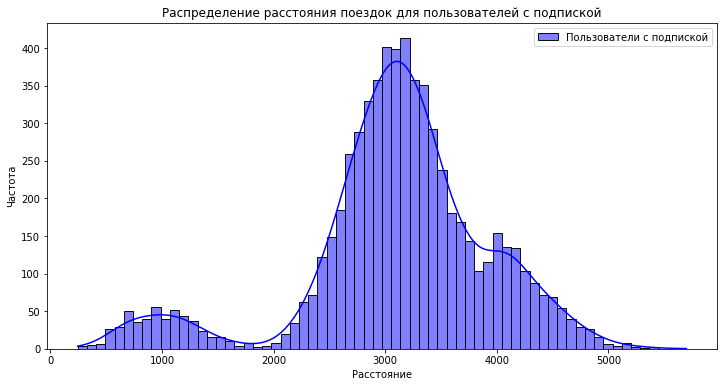

In [51]:
# Извлечение данных о расстоянии поездок для пользователей с подпиской 'ultra'
ultra_subscribers_distance = merged_data_users_rides_subscriptions[merged_data_users_rides_subscriptions['subscription_type'] == 'ultra']['distance']

# Расчет описательной статистики для расстояний поездок пользователей с подпиской 'ultra'
ultra_desc_distance = ultra_subscribers_distance.describe()

# Вывод описательной статистики
print("Распределение расстояния поездок для пользователей с подпиской: Описательная статистика")
print(ultra_desc_distance)

# Настройка размера графика
plt.figure(figsize=(12, 6))

# Построение гистограммы для расстояния поездок пользователей с подпиской 'ultra'
sns.histplot(ultra_subscribers_distance, color='blue', kde=True, label='Пользователи с подпиской')

# Настройка заголовка и подписей осей графика
plt.title('Распределение расстояния поездок для пользователей с подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.legend()

# Отображение графика
plt.show()

Нулевая гипотеза (H0): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно или меньше 3130 метров.

Альтернативная гипотеза (H1): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [52]:
# Устанавливаем интересующее нас значение на уровне 3130 метров
interested_value = 3130

# Уровень значимости
alpha = 0.05

# Выполняем односторонний t-тест для одной выборки
# Сравниваем среднее значение выборки (среднее расстояние для пользователей с подпиской)
# с интересующим нас значением (3130 метров)
# alternative='greater' проверяет, больше ли среднее выборки, чем интересующее нас значение
results = stats.ttest_1samp(ultra_subscribers_distance, interested_value, alternative='greater')

# Выводим p-значение, полученное из теста
print('p-значение:', results.pvalue)

# Интерпретируем результаты
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние статистически значимо больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние не больше 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: среднее расстояние не больше 3130 метров


При таком значении p-значения мы не получили статистически значимых доказательств для отвержения нулевой гипотезы. Это означает, что наши данные не позволяют считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

***6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.***

Нулевая гипотеза (H0): Средняя помесячная выручка от пользователей с подпиской не отличается от средней помесячной выручки от пользователей без подписки.

Альтернативная гипотеза (H1): Средняя помесячная выручка от пользователей с подпиской больше, чем средняя помесячная выручка от пользователей без подписки.

Описательная статистика для выручки от пользователей с подпиской 'ultra':
count    4533.000000
mean      361.481800
std        86.399966
min       223.000000
25%       301.000000
50%       331.000000
75%       403.000000
max       943.000000
Name: monthly_revenue, dtype: float64

Описательная статистика для выручки от пользователей без подписки 'free':
count    6798.000000
mean      325.842895
std       180.515646
min        58.000000
25%       194.000000
50%       268.000000
75%       420.000000
max      1428.000000
Name: monthly_revenue, dtype: float64


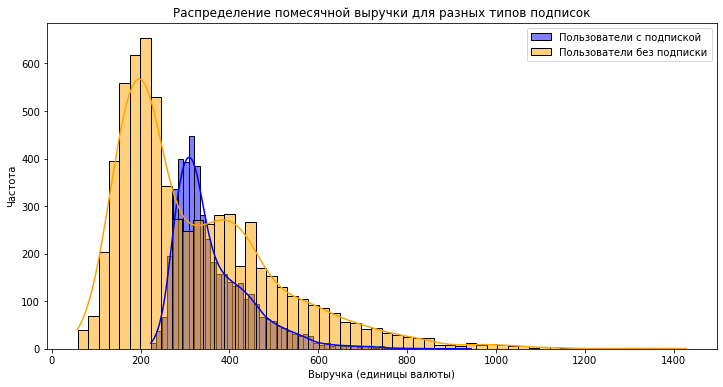

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской статистически значимо больше


In [53]:
# Загрузка данных о выручке. Получаем данные о помесячной выручке
# для пользователей с подпиской и без подписки из агрегированных данных
revenue_with_subscription = ultra_users_aggregated_data['monthly_revenue']
revenue_without_subscription = free_users_aggregated_data['monthly_revenue']

# Расчет описательной статистики для выручки от пользователей с подпиской 'ultra'
revenue_with_subscription_desc = revenue_with_subscription.describe()

# Расчет описательной статистики для выручки от пользователей без подписки 'free'
revenue_without_subscription_desc = revenue_without_subscription.describe()

# Вывод описательной статистики для выручки
print("Описательная статистика для выручки от пользователей с подпиской 'ultra':")
print(revenue_with_subscription_desc)
print("\nОписательная статистика для выручки от пользователей без подписки 'free':")
print(revenue_without_subscription_desc)

# Настройка размера графика
plt.figure(figsize=(12, 6))

# Построение гистограммы для выручки от пользователей с подпиской
sns.histplot(revenue_with_subscription, color='blue', kde=True, label='Пользователи с подпиской')

# Построение гистограммы для выручки от пользователей без подписки
sns.histplot(revenue_without_subscription, color='orange', kde=True, label='Пользователи без подписки')

# Настройка заголовка и подписей осей графика
plt.title('Распределение помесячной выручки для разных типов подписок')
plt.xlabel('Выручка (единицы валюты)')
plt.ylabel('Частота')
plt.legend()

# Отображение графика
plt.show()

# Устанавливаем уровень значимости для последующего статистического теста
# Обычно используется уровень 0.05, что соответствует 95% уровню доверия
alpha = 0.05

# Производим двухвыборочный t-тест для независимых выборок, чтобы сравнить
# средние значения выручки от двух разных групп (пользователей с подпиской и без подписки)
# alternative='greater' означает, что мы проверяем, больше ли среднее одной выборки, по сравнению с другой
t_statistic, p_value = stats.ttest_ind(revenue_with_subscription, revenue_without_subscription, alternative='greater')

# Выводим p-значение, чтобы увидеть вероятность получить такие или еще более экстремальные
# значения статистики теста, если нулевая гипотеза верна
print('p-значение:', p_value)

# Интерпретируем результаты теста на основе p-значения и уровня значимости
# Если p-значение меньше alpha, отвергаем нулевую гипотезу, что указывает на
# статистически значимое различие между средними двух групп
# Если p-значение больше alpha, недостаточно оснований для отклонения нулевой гипотезы
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской статистически значимо больше')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской не статистически значимо больше')

Учитывая такое низкое значение p-значения, мы отвергаем нулевую гипотезу. Это означает, что наши статистические данные позволяют сделать вывод о том, что средняя помесячная выручка от пользователей с подпиской статистически значимо больше, чем средняя помесячная выручка от пользователей без подписки. Таким образом, мы можем утверждать, что пользователи с подпиской приносят больше выручки компании по сравнению с пользователями без подписки.

***6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?***

Для проверки гипотезы о том, что обновление серверов привело к значимому снижению количества обращений в техподдержку, можно использовать парный t-тест (paired t-test). Этот статистический тест подходит для сравнения средних двух связанных выборок - в данном случае, количество обращений в техподдержку до и после обновления для каждого пользователя.

Гипотезы могут быть сформулированы следующим образом:

Нулевая гипотеза (H0): Обновление серверов не привело к значимому изменению количества обращений в техподдержку. Среднее количество обращений до и после обновления равно.

Альтернативная гипотеза (H1): Обновление серверов привело к значимому снижению количества обращений в техподдержку. Среднее количество обращений после обновления меньше, чем до обновления.

В данном случае гипотеза является односторонней, так как интересует только уменьшение количества обращений после обновления серверов. Таким образом, альтернативная гипотеза (H1) формулируется как уменьшение количества обращений, исключая другие возможные направления изменений.

#### Шаг 7. Распределения

***7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.***

Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.

In [54]:
# Заданные значения
p = 0.1  # Вероятность того, что клиент продлит подписку
target = 100  # Целевое количество клиентов, которые должны продлить подписку
target_prob = 0.05  # Целевая вероятность не достижения цели

# Функция для нахождения минимального количества промокодов для рассылки
def find_minimum_promo_codes(p, target, target_prob):
    # Начинаем проверку с числа, немного превышающего целевое
    n = target
    # Вычисляем вероятность того, что будет получено максимум target-1 успешное продление подписки
    while binom.cdf(target - 1, n, p) > target_prob:
        n += 1  # Увеличиваем количество промокодов, пока вероятность не достигнет целевого уровня
    return n

# Рассчитываем минимальное количество промокодов, необходимое для рассылки
min_promo_codes = find_minimum_promo_codes(p, target, target_prob)

# Выводим результат
min_promo_codes

1161

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


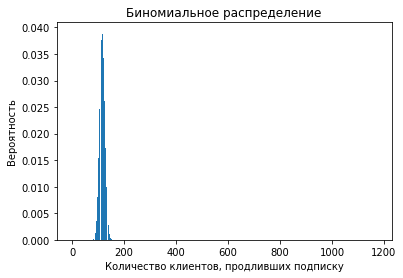

In [55]:
# Построение графика распределения
x = range(min_promo_codes + 10)  # Диапазон значений для графика
y = [binom.pmf(k, min_promo_codes, p) for k in x]  # Значения вероятности для каждого количества успешных исходов

# Строим график
plt.bar(x, y)
plt.title("Биномиальное распределение")
plt.xlabel("Количество клиентов, продливших подписку")
plt.ylabel("Вероятность")
plt.show()

Расчёт подтверждает, что для достижения цели с вероятностью около 95% (то есть с вероятностью не достижения цели в 5%) необходимо разослать минимум 1161 промокод.

***7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать  1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.***

Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

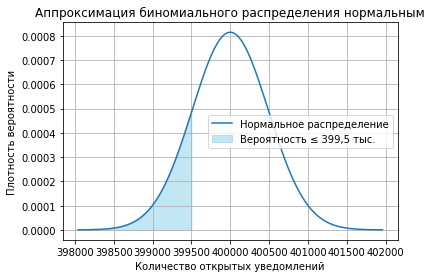

0.15371708296369768

In [56]:
# Параметры задачи
n = 1_000_000  # количество уведомлений
p = 0.4  # вероятность открытия уведомления
threshold = 399_500  # пороговое значение для расчета вероятности

# Расчет параметров нормального распределения
mu = n * p  # математическое ожидание (среднее значение)
sigma = np.sqrt(n * p * (1 - p))  # стандартное отклонение

# Расчет вероятности, что количество открытых уведомлений не превысит пороговое значение
probability = norm.cdf(threshold, mu, sigma)

# Генерация значений для графика
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  # значения по оси X для графика
y = norm.pdf(x, mu, sigma)  # значения плотности вероятности для графика

# Построение графика
plt.plot(x, y, label='Нормальное распределение')  # график нормального распределения
plt.fill_between(x, 0, y, where=(x <= threshold), 
                 color='skyblue', alpha=0.5, label='Вероятность ≤ 399,5 тыс.')
plt.title('Аппроксимация биномиального распределения нормальным')  # заголовок графика
plt.xlabel('Количество открытых уведомлений')  # подпись оси X
plt.ylabel('Плотность вероятности')  # подпись оси Y
plt.legend()  # отображение легенды
plt.grid(True)  # отображение сетки
plt.show()  # отображение графика

probability  # вывод рассчитанной вероятности

Вероятность того, что не более 399,5 тыс. пользователей откроют уведомление, составляет примерно 15.37%. Это означает, что с помощью нормальной аппроксимации биномиального распределения, мы можем ожидать с вероятностью около 15.37%, что количество открытых уведомлений не превысит 399,5 тысяч из миллиона.

# Итоговый Вывод

Основные статистики по группам пользователей:
- Пользователи с бесплатной подпиской ('free') преобладают над пользователями с подпиской 'ultra'. Это указывает на большую доступность или привлекательность бесплатной версии услуги.
- Пользователи 'ultra' в среднем проводят больше времени в поездках и склонны к более длительным поездкам по сравнению с пользователями 'free'.

Выводы по гипотезам:
- Существует статистически значимая разница в среднем времени поездок между пользователями 'ultra' и 'free', что подтверждает, что пользователи 'ultra' проводят в поездках больше времени.
- Нет статистически значимых доказательств для того, чтобы утверждать, что среднее расстояние, которое проезжают пользователи с подпиской, больше 3130 метров.
- Средняя помесячная выручка от пользователей с подпиской значительно выше, чем от пользователей без подписки.

Сравнение годовой и среднемесячной выручки:
- Годовая выручка от пользователей с подпиской 'ultra' может быть выше из-за более высоких тарифов, несмотря на меньшее количество пользователей.
- Среднемесячная выручка от каждого пользователя 'ultra', вероятно, также выше, что указывает на более высокую ценность каждого пользователя в этой категории для бизнеса.

Итоговая рекомендация бизнесу:
- Фокусироваться на удержании и привлечении пользователей 'ultra', так как они приносят больше дохода.
- Разработать стратегии для конвертации пользователей из 'free' в 'ultra', возможно, через улучшение услуг или предложение индивидуальных планов подписки.
- Учитывать, что основная аудитория молода, и адаптировать маркетинговые и рекламные кампании для удовлетворения их интересов и потребностей.
- Проводить анализ поведения пользователей в разных географических регионах и настраивать предложения в соответствии с региональными предпочтениями.
- Учитывать результаты анализа продолжительности и расстояния поездок для планирования и оптимизации услуг.

In [63]:
free_users_aggregated_data['subscription_fee'] = 'free'
ultra_users_aggregated_data['subscription_fee'] = 'ultra'

In [64]:
df_rides = ultra_users_aggregated_data.merge(free_users_aggregated_data, how='outer')

In [65]:
df_rides.columns

Index(['user_id', 'month', 'total_distance', 'total_rides', 'total_time',
       'rounded_duration', 'monthly_revenue', 'subscription_fee'],
      dtype='object')

In [66]:
df_rides

,user_id,month,total_distance,total_rides,total_time,rounded_duration,monthly_revenue,subscription_fee
0,1,1,7027.511294,2,41.416640,42.0,451.0,ultra
1,1,4,754.159807,1,6.232113,7.0,241.0,ultra
2,1,8,6723.470560,2,44.776802,45.0,469.0,ultra
3,1,10,5809.911100,2,31.578017,32.0,391.0,ultra
4,1,11,7003.499363,3,53.397424,54.0,523.0,ultra
...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,24.812678,25.0,300.0,free
11327,1534,8,7622.453034,2,47.205960,48.0,484.0,free
11328,1534,9,4928.173852,1,22.560373,23.0,234.0,free
11329,1534,11,13350.015305,4,76.342174,77.0,816.0,free


In [67]:
dfg_first = df_rides.copy()

In [68]:
x = 'subscription_fee'
y = 'monthly_revenue'

In [69]:
dfg_first.groupby(x)[y].mean().round(1).to_frame()

,monthly_revenue
subscription_fee,
free,325.8
ultra,361.5


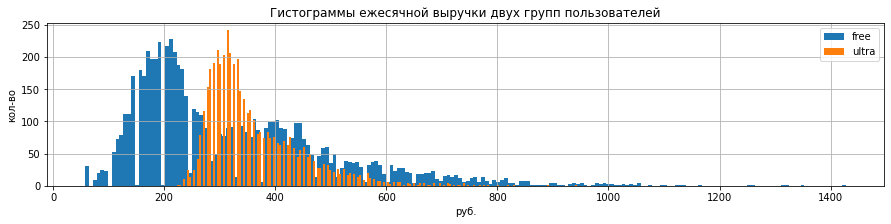

In [70]:
dfg_first.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');

In [71]:
# копируем таблицу
dfg = dfg_first.copy()


In [72]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11331 non-null  int64  
 1   month             11331 non-null  int64  
 2   total_distance    11331 non-null  float64
 3   total_rides       11331 non-null  int64  
 4   total_time        11331 non-null  float64
 5   rounded_duration  11331 non-null  float64
 6   monthly_revenue   11331 non-null  float64
 7   subscription_fee  11331 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 796.7+ KB


In [73]:
# удаляем данные, 20%
for col in dfg.columns:
    dfg.loc[dfg.sample(frac=0.2).index, col] = np.nan

In [74]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9065 non-null   float64
 1   month             9065 non-null   float64
 2   total_distance    9065 non-null   float64
 3   total_rides       9065 non-null   float64
 4   total_time        9065 non-null   float64
 5   rounded_duration  9065 non-null   float64
 6   monthly_revenue   9065 non-null   float64
 7   subscription_fee  9065 non-null   object 
dtypes: float64(7), object(1)
memory usage: 1.0+ MB


In [75]:
dfg.groupby(x)[y].mean().round(1).to_frame()

,monthly_revenue
subscription_fee,
free,327.2
ultra,361.5


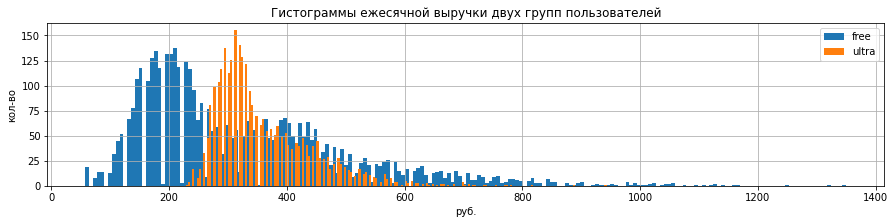

In [76]:
dfg.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');

In [77]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = stats.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу
